In [3]:
import pandas as pd
import numpy as np
import nilearn
from nilearn.datasets import MNI152_FILE_PATH
print(f"Path to MNI152 template: {MNI152_FILE_PATH!r}")

from nilearn import datasets
print(f"Datasets are stored in : {datasets.get_data_dirs()!r}")
from nilearn import plotting

Path to MNI152 template: '/home/jk/anaconda3/envs/nilearn/lib/python3.9/site-packages/nilearn/datasets/data/mni_icbm152_t1_tal_nlin_sym_09a_converted.nii.gz'
Datasets are stored in : ['/home/jk/nilearn_data']


### Plot MNI structural image

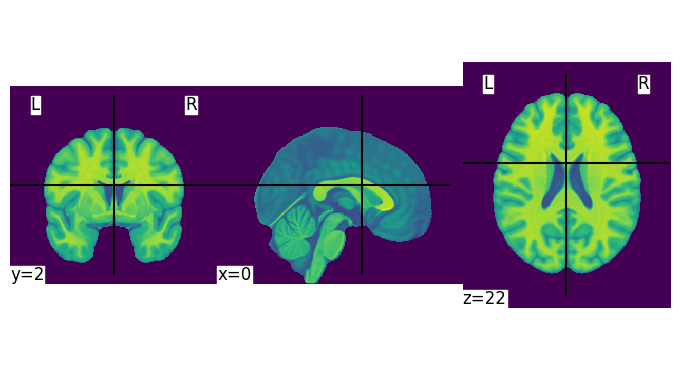

In [4]:
nilearn.plotting.plot_img(MNI152_FILE_PATH)

#### Smooth and Plot

In [5]:
from nilearn import image

smooth_anat_img = image.smooth_img(MNI152_FILE_PATH, fwhm=3)

# While we are giving a file name as input, the function returns
# an in-memory object:
smooth_anat_img

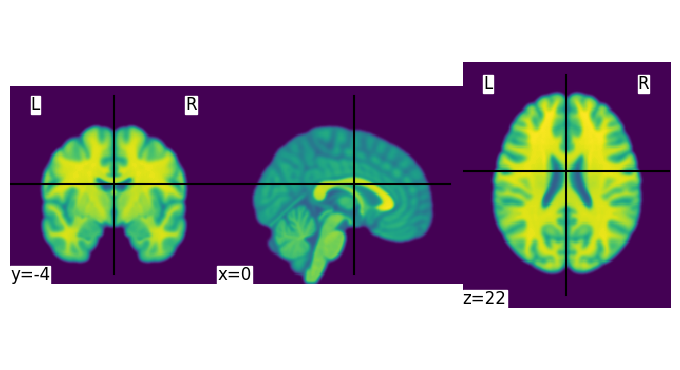

In [6]:
plotting.plot_img(smooth_anat_img)

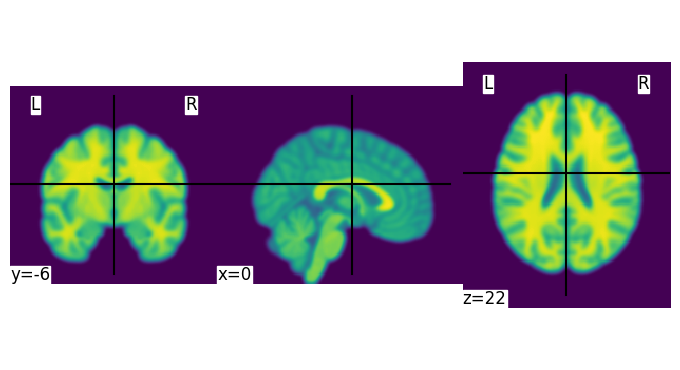

In [7]:
more_smooth_anat_img = image.smooth_img(smooth_anat_img, fwhm=3)
plotting.plot_img(more_smooth_anat_img)

In [8]:
from pathlib import Path

output_dir = Path.cwd() / "results" / "plot_nilearn_101"
output_dir.mkdir(exist_ok=True, parents=True)
print(f"Output will be saved to: {output_dir}")
more_smooth_anat_img.to_filename(output_dir / "more_smooth_anat_img.nii.gz")

Output will be saved to: /home/jk/repos/fmri_analysis/results/plot_nilearn_101


In [9]:
# to show outside of notebook
plotting.show()

## Visualize Statistical Brain Maps

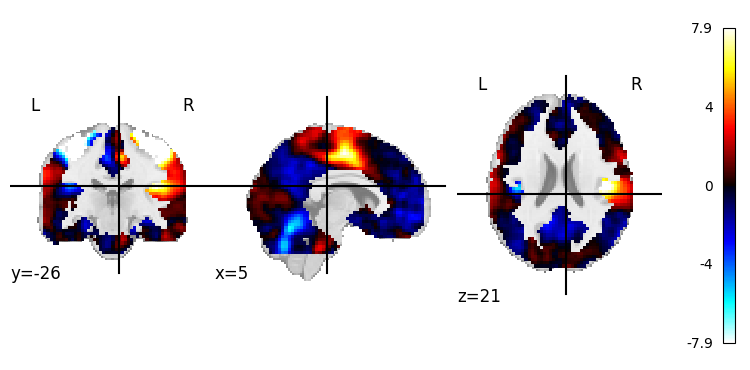

In [10]:
images_filenames = datasets.fetch_neurovault_motor_task()

tmap_filename = images_filenames.images[0]

plotting.plot_stat_map(tmap_filename)

### Threshold to better visualize peak activity

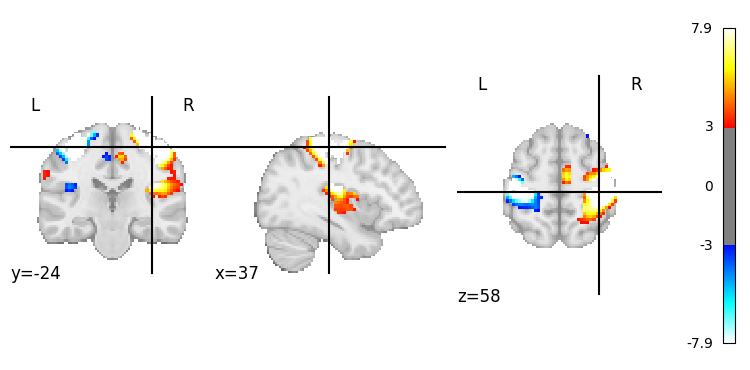

In [11]:
plotting.plot_stat_map(tmap_filename, threshold=3)

### Visualize 4D Resting-State network brain volumes

In [12]:
rsn = datasets.fetch_atlas_smith_2009(resting=True, dimension=10)["maps"]
rsn

'/home/jk/nilearn_data/smith_2009/PNAS_Smith09_rsn10.nii.gz'

In [13]:
from nilearn import image

print(f"4D vol dimensions: {image.load_img(rsn).shape}")

4D vol dimensions: (91, 109, 91, 10)


In [14]:
first_rsn = image.index_img(rsn, 0)
print(first_rsn.shape)

(91, 109, 91)


#### Plot first volume

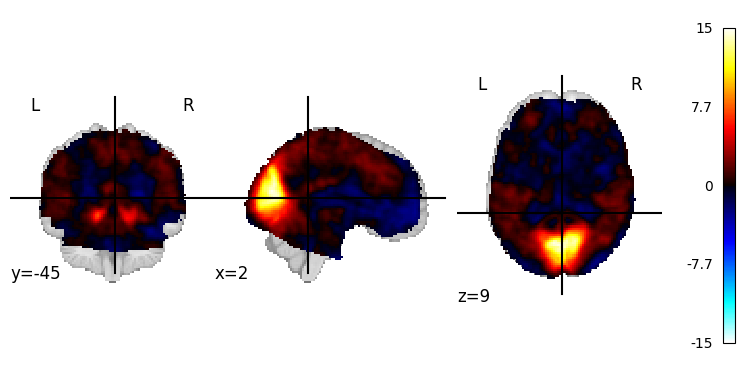

In [15]:
plotting.plot_stat_map(first_rsn)

#### Plot all 10 volumes in 4d file w/ threshold

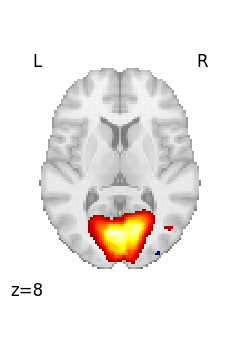

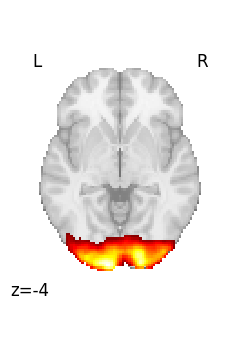

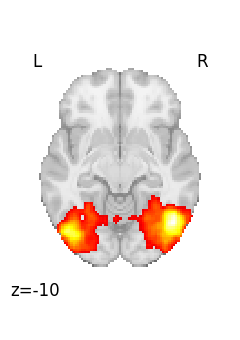

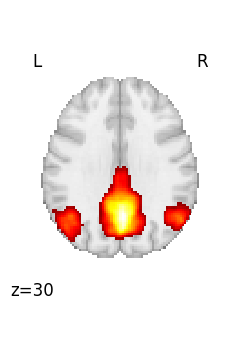

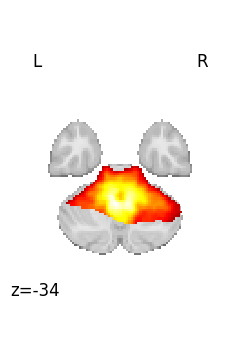

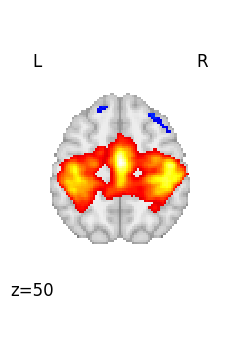

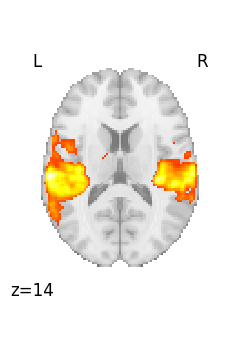

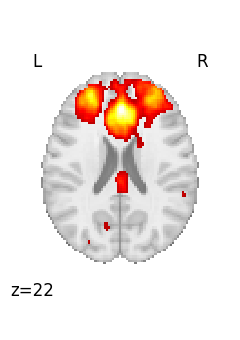

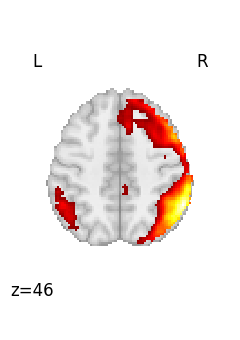

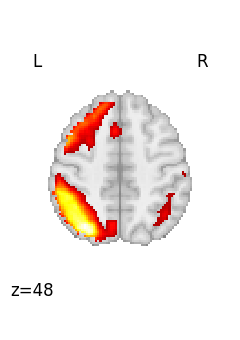

In [16]:
for img in image.iter_img(rsn):
    # img is now an in-memory 3D img
    plotting.plot_stat_map(
        img, threshold=3, display_mode="z", cut_coords=1, colorbar=False
    )

#### Loop through selected volumes in a 4D file
* using slice function and iter_img

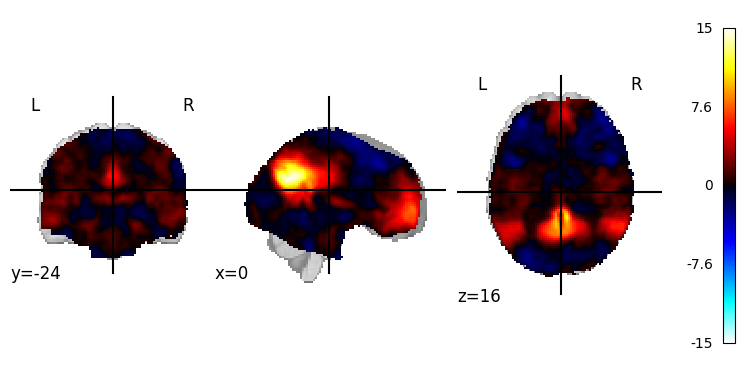

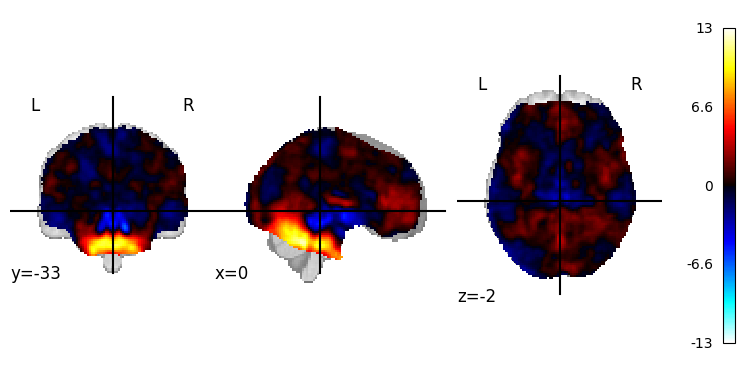

In [17]:
selected_volumes = image.index_img(rsn, slice(3, 5))

for img in image.iter_img(selected_volumes):
    plotting.plot_stat_map(img)